# 당뇨병 일차선형회귀

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df_train = pd.read_csv('../static/data/regression/diabetes_train.csv')
df_train.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.063635,-0.044642,-0.033151,-0.033214,0.001183,0.024051,-0.024993,-0.002592,-0.022512,-0.059067,214.0
1,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349,98.0
2,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207,127.0


In [3]:
feature = 'bp'

In [8]:
# 1차원 Series, 먼저 2차원으로 바꾸고 values 메소드를 사용해서 array로 바꾼 후 reshape
X_train = df_train[feature].values.reshape(-1,1)
y_train = df_train.target.values
X_train.shape, y_train.shape

((331, 1), (331,))

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
# 트레인셋으로 lr를 fit 한 다음 X_test로 pred를 구하고, y_test와 비교
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# fit 되었다는 것은 트레인셋 데이터의 특징(최소, 최대, 중간값...등) 들을 기억하는 모델을 만들었다는 것. 그래서 test_set을 넣으면 비슷하게 흘러갈거라는 생각
# Fit된 Lr의 정보
weight, bias = lr.coef_, lr.intercept_
print(weight)
print(bias)

[686.11222571]
148.91869337400198


In [12]:
# 테스트 셋
df_test = pd.read_csv('../static/data/regression/diabetes_test.csv')
df_test.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.034443,-0.044642,-0.007284,0.014987,-0.044223,-0.037326,-0.002903,-0.039493,-0.021394,0.007207,155.0
1,-0.009147,-0.044642,0.037984,-0.040099,-0.024960,-0.003819,-0.043401,0.015858,-0.005145,0.027917,167.0
2,0.005383,0.050680,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038393,-0.013504,185.0


In [13]:
df_test.shape

(111, 11)

In [14]:
# Client에서 Server로 주는 index
index = 20

In [16]:
df_test[feature][index]

-0.0779708951233958

In [19]:
# 단순선형회귀(일차선형회귀) 이기 때문에 값이 하나만 나옴
X_test = df_test[feature][index]
y_test = df_test.target[index]
X_test, y_test

(-0.0779708951233958, 60.0)

In [20]:
# 역시 단순선형회귀이기 때문에 값이 하나만 나옴
weight

array([686.11222571])

In [21]:
pred = X_test * weight[0] + bias
pred

95.42190898027496

In [22]:
# 시각화 - 실제 y_test값과 pred값 비교
import matplotlib.pyplot as plt 
%matplotlib inline

In [23]:
# X_train의 최소/최대값의 y값
# y_train의 최소/최대값과는 다르다
y_min = np.min(X_train) * weight[0] + bias
y_max = np.max(X_train) * weight[0] + bias

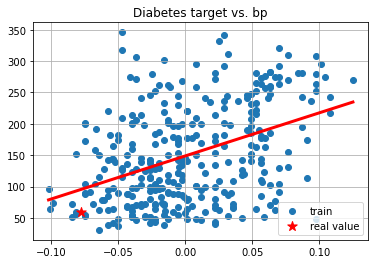

In [26]:
plt.scatter(X_train, y_train, label='train')
plt.plot([np.min(X), np.max(X)], [y_min, y_max], 'r', lw=3)
plt.scatter([X_test], [y_test], c='r', marker='*', s=100, label='real value')
plt.grid()
plt.legend()
plt.title(f'Diabetes target vs. {feature}')
plt.show()